In [1]:
%cd /mnt/i/Yuki/workspace/exercises/image_processing_100_knock/Gasyori100knock

/mnt/i/Yuki/workspace/exercises/image_processing_100_knock/Gasyori100knock


https://github.com/yoyoyo-yo/Gasyori100knock/tree/master/Question_21_30

# 準備

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img_path = 'Question_21_30/imori.jpg'
img = cv2.imread(img_path)

dark_img_path = 'Question_21_30/imori_dark.jpg'
dark_img = cv2.imread(dark_img_path)

gamma_img_path = 'Question_21_30/imori_gamma.jpg'
gamma_img = cv2.imread(gamma_img_path)

## OpenCV は BGR を採用しているので RGB に変換する
BGR を採用している理由は単なる歴史的経緯らしい

In [4]:
img = img[:, :, ::-1]
dark_img = dark_img[:, :, ::-1]
gamma_img = gamma_img[:, :, ::-1]

# 問題

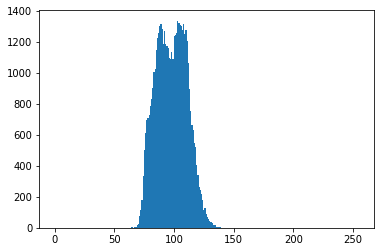

In [5]:
counts = plt.hist(dark_img.flatten(), bins=256, range=(0, 255))

## Q.21. ヒストグラム正規化

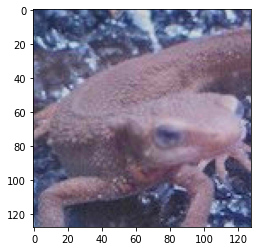

In [6]:
ans = dark_img.copy()
ans = ((ans - 60) / (141 - 60) * 255).astype(np.uint8)
plt.imshow(ans)

## Q.22. ヒストグラム操作

In [7]:
ans = dark_img.copy()
mean = np.mean(ans)
std = np.mean((ans - mean) ** 2) ** 0.5

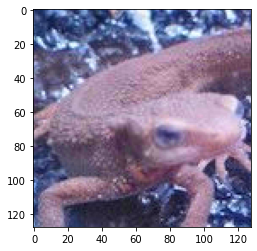

In [8]:
mean0 = 128
std0 = 52
ans = (ans - mean) / std * std0 + mean0
ans = np.clip(ans, 0, 255).astype(np.uint8)
plt.imshow(ans)

## Q.23. ヒストグラム平坦化

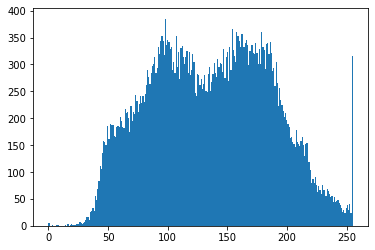

In [9]:
counts, _, _ = plt.hist(img.flatten(), bins=256, range=(0, 255))

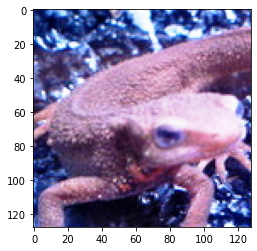

In [10]:
S = np.sum(counts)
Z = np.max(img)
Z_transformed = (np.cumsum(counts) / S * Z).astype(np.uint8)
base = img.copy()
ans = np.zeros_like(base)
for i, z in enumerate(Z_transformed.astype(np.uint8)):
    ans += (base == i) * z
plt.imshow(ans)

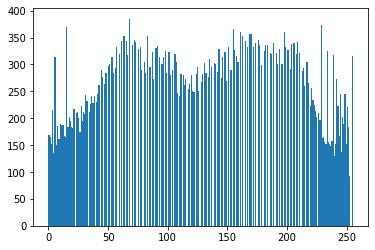

In [11]:
counts, _, _ = plt.hist(ans.flatten(), bins=256, range=(0, 255))

## Q.24. ガンマ補正

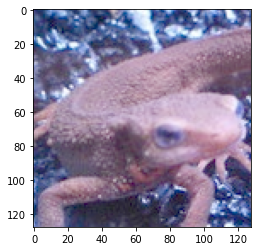

In [12]:
c = 1
gamma = 2.2

ans = gamma_img.copy().astype(np.float)
ans /= 255 * c
ans **= 1/ gamma
ans *= 255
ans = ans.astype(np.uint8)

plt.imshow(ans)

## Q.25. 最近傍補間

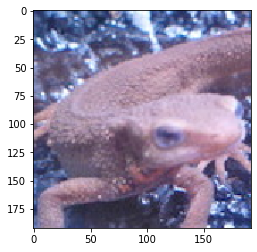

In [13]:
a = 1.5

base = img.copy()
ans = np.zeros((int(base.shape[0] * a), int(base.shape[1] * a), 3))
for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        round_i = int(np.round(i / a))
        round_j = int(np.round(j / a))
        ans[i, j] = base[round_i, round_j]

ans = ans.astype(np.uint8)
plt.imshow(ans)

## Q.26. Bi-linear補間

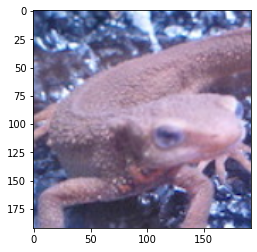

In [14]:
a = 1.5

base = img.copy()
ans = np.zeros((int(base.shape[0] * a), int(base.shape[1] * a), 3))
for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        base_i = int(np.floor(i / a))
        base_j = int(np.floor(j / a))

        for i0 in range(2):
            for j0 in range(2):
                di = abs(1 - (i / a - base_i) - i0)
                dj = abs(1 - (j / a - base_j) - j0)
                target_i = max(min(base_i + i0, base.shape[0] - 1), 0)
                target_j = max(min(base_j + j0, base.shape[1] - 1), 0)
                ans[i, j] += di * dj * base[target_i, target_j]

ans = ans.astype(np.uint8)
plt.imshow(ans)

## Q.27. Bi-cubic補間

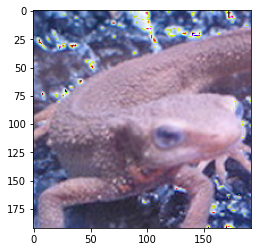

In [15]:
def h(t, a=-1):
    t = abs(t)
    if t <= 1:
        return (a + 2) * (t ** 3) - (a + 3) * (t ** 2) + 1
    elif t <= 2:
        return a * (t ** 3) - 5 * a * (t ** 2) + 8 * a * t - 4 * a
    return 0

base = img.copy()
ans = np.zeros((int(base.shape[0] * a), int(base.shape[1] * a), 3))
for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        floor_i = int(np.floor(i / a))
        floor_j = int(np.floor(j / a))
        
        w = 0
        for i0 in range(4):
            for j0 in range(4):
                di = abs(i / a - (floor_i + i0 - 1))
                dj = abs(j / a - (floor_j + j0 - 1))
                base_i = max(min(floor_i + i0 - 1, base.shape[0] - 1), 0)
                base_j = max(min(floor_j + j0 - 1, base.shape[1] - 1), 0)
                ans[i, j] += base[base_i, base_j] * h(di) * h(dj)
                w += h(di) * h(dj)
        ans[i, j] /= w

ans = ans.astype(np.uint8)
plt.imshow(ans)

## Q.28. アフィン変換(平行移動)

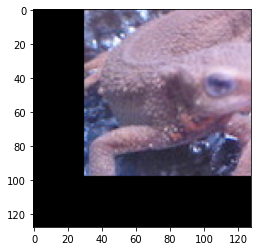

In [16]:
tx = 30
ty = -30

A = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1],
])

A_inv = np.linalg.inv(A)

base = img.copy()
ans = np.zeros_like(base)

for y in range(ans.shape[0]):
    for x in range(ans.shape[1]):
        base_x, base_y, _ = np.matmul(A_inv, np.array([x, y, 1]))
        base_x = int(base_x)
        base_y = int(base_y)
        if base_y < 0 or base.shape[0] <= base_y:
            continue
        if base_x < 0 or base.shape[1] <= base_x:
            continue
        ans[y, x] = base[base_y, base_x]

ans = ans.astype(np.uint8)
plt.imshow(ans)

## Q.29. アフィン変換(拡大縮小)

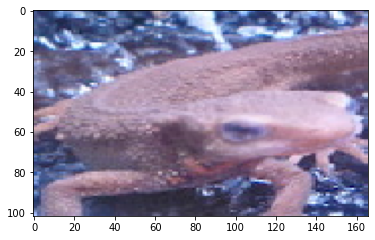

In [17]:
ax = 1.3
ay = 0.8

tx = 0
ty = 0

A = np.array([
    [ax, 0, tx],
    [0, ay, ty],
    [0, 0, 1],
])

A_inv = np.linalg.inv(A)

base = img.copy()
ans = np.zeros((int(base.shape[0] * ay), int(base.shape[1] * ax), 3))

for y in range(ans.shape[0]):
    for x in range(ans.shape[1]):
        base_x, base_y, _ = np.matmul(A_inv, np.array([x, y, 1]))
        base_x = int(base_x)
        base_y = int(base_y)
        if base_y < 0 or base.shape[0] <= base_y:
            continue
        if base_x < 0 or base.shape[1] <= base_x:
            continue
        ans[y, x] = base[base_y, base_x]

ans = ans.astype(np.uint8)
plt.imshow(ans)

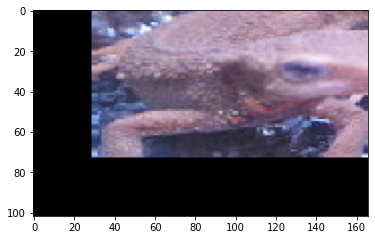

In [18]:
ax = 1.3
ay = 0.8

tx = 30
ty = -30

A = np.array([
    [ax, 0, tx],
    [0, ay, ty],
    [0, 0, 1],
])

A_inv = np.linalg.inv(A)

base = img.copy()
ans = np.zeros((int(base.shape[0] * ay), int(base.shape[1] * ax), 3))

for y in range(ans.shape[0]):
    for x in range(ans.shape[1]):
        base_x, base_y, _ = np.matmul(A_inv, np.array([x, y, 1]))
        base_x = int(base_x)
        base_y = int(base_y)
        if base_y < 0 or base.shape[0] <= base_y:
            continue
        if base_x < 0 or base.shape[1] <= base_x:
            continue
        ans[y, x] = base[base_y, base_x]

ans = ans.astype(np.uint8)
plt.imshow(ans)

## Q.30. アフィン変換(回転)

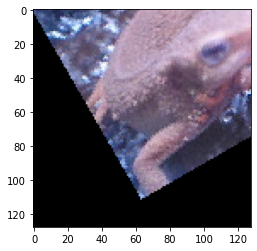

In [19]:
A = -30

tx = 0
ty = 0

A = np.array([
    [np.cos(A / 180 * np.pi), - np.sin(A / 180 * np.pi), tx],
    [np.sin(A / 180 * np.pi), np.cos(A / 180 * np.pi), ty],
    [0, 0, 1],
])

A_inv = np.linalg.inv(A)

base = img.copy()
ans = np.zeros_like(base)

for y in range(ans.shape[0]):
    for x in range(ans.shape[1]):
        base_x, base_y, _ = np.matmul(A_inv, np.array([x, y, 1]))
        base_x = int(base_x)
        base_y = int(base_y)
        if base_y < 0 or base.shape[0] <= base_y:
            continue
        if base_x < 0 or base.shape[1] <= base_x:
            continue
        ans[y, x] = base[base_y, base_x]

ans = ans.astype(np.uint8)
plt.imshow(ans)

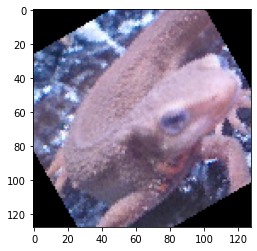

In [20]:
A = -30

tx = 0
ty = 0

A = np.array([
    [np.cos(A / 180 * np.pi), - np.sin(A / 180 * np.pi), tx],
    [np.sin(A / 180 * np.pi), np.cos(A / 180 * np.pi), ty],
    [0, 0, 1],
])

A_inv = np.linalg.inv(A)

base = img.copy()
ans = np.zeros_like(base)

center_y = int(base.shape[0] / 2)
center_x = int(base.shape[1] / 2)

for y in range(ans.shape[0]):
    for x in range(ans.shape[1]):
        base_x, base_y, _ = np.matmul(A_inv, np.array([x - center_x, y - center_y, 1]))
        base_x = int(base_x + center_x)
        base_y = int(base_y + center_y)
        if base_y < 0 or base.shape[0] <= base_y:
            continue
        if base_x < 0 or base.shape[1] <= base_x:
            continue
        ans[y, x] = base[base_y, base_x]

ans = ans.astype(np.uint8)
plt.imshow(ans)